In [1]:
import sys
sys.path.append('/Users/robertodelprete/Desktop/AutoFocusNet')

In [2]:
from processor.focus import Focalizer
import torch
import pandas as pd
import pickle
from pathlib import Path 
import matplotlib.pyplot as plt
import seaborn as sns

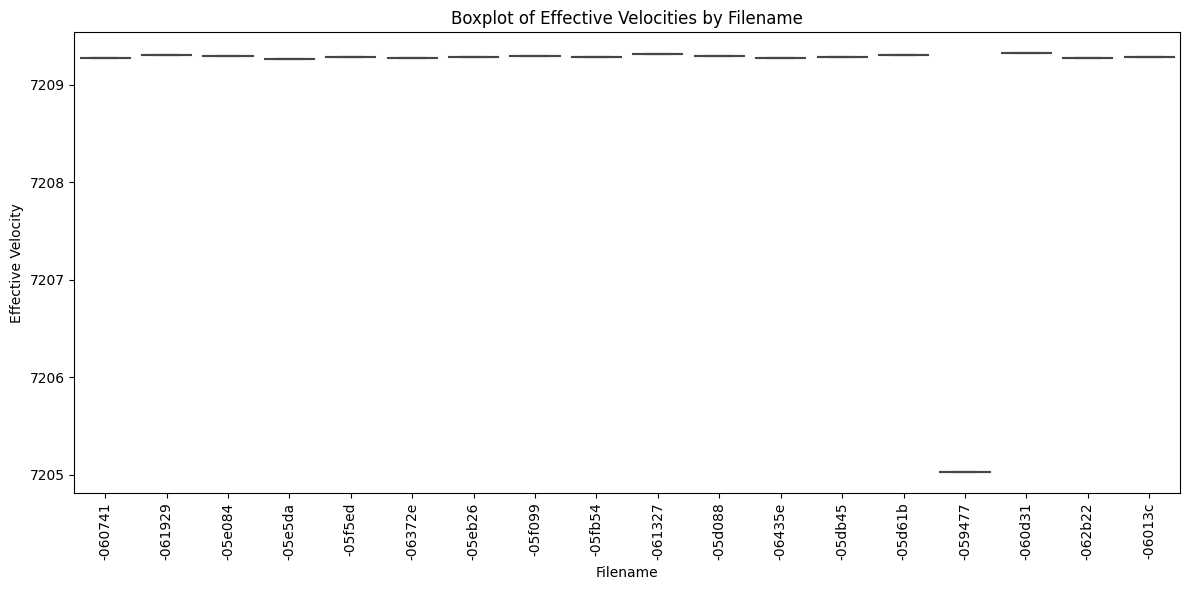

In [7]:
subfolders = list(Path('/Users/robertodelprete/Desktop/AutoFocusNet/DATA/DECODED').iterdir())
# Data collection
data = []

# Iterate through each folder
for folder in subfolders:
    meta_file = [x for x in folder.iterdir() if 'meta' in x.stem][0]
    ephemeris_file = [x for x in folder.iterdir() if 'ephem' in x.stem][0]
    
    meta = pd.read_pickle(meta_file)
    ephemeris = pd.read_pickle(ephemeris_file)
    
    dummy = torch.rand(4096, 4096)  # Placeholder for actual data
    meta = meta.head(4096)
    
    rd = Focalizer(raw_data={'echo': dummy, 'ephemeris': ephemeris, 'metadata': meta})
    eff = rd.effective_velocities()
    
    # Store data for boxplot
    data.append({'filename': folder.name[-7:], 'velocity': eff.mean()})

# Create DataFrame for plotting
df = pd.DataFrame(data)
# Ensure the 'velocity' column is numeric
df['velocity'] = pd.to_numeric(df['velocity'])

# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='filename', y='velocity', data=df)
plt.xticks(rotation=90)
plt.xlabel('Filename')
plt.ylabel('Effective Velocity')
plt.title('Boxplot of Effective Velocities by Filename')
plt.tight_layout()
plt.savefig('../figures/eff_vel.png')
# Show plot
plt.show()

In [ ]:
list(eff.flatten())

In [ ]:
dummy = torch.rand(4096,4096) # height, width or Azimuth - Range
eph = pd.read_pickle('/Users/robertodelprete/Desktop/AutoFocusNet/DATA/DECODED/s1a-s2-raw-s-hh-20230922t213540-20230922t213605-050446-061327/s1a-s2-raw-s-hh-20230922t213540-20230922t213605-050446-061327_ephemeris.pkl')
meta = pd.read_pickle('/Users/robertodelprete/Desktop/AutoFocusNet/DATA/DECODED/s1a-s2-raw-s-hh-20230922t213540-20230922t213605-050446-061327/s1a-s2-raw-s-hh-20230922t213540-20230922t213605-050446-061327_pkt_8_metadata.pkl')

meta = meta.head(4096)
rd = Focalizer(raw_data={'echo':dummy, 'ephemeris':eph, 'metadata':meta})

eff=rd.effective_velocities()
print(eff.mean())


In [ ]:
dummy = torch.rand(4096,4096) # height, width or Azimuth - Range
eph = pd.read_pickle('/Users/robertodelprete/Desktop/AutoFocusNet/DATA/DECODED/s1a-s2-raw-s-hh-20230922t213540-20230922t213605-050446-061327/s1a-s2-raw-s-hh-20230922t213540-20230922t213605-050446-061327_ephemeris.pkl')
meta = pd.read_pickle('/Users/robertodelprete/Desktop/AutoFocusNet/DATA/DECODED/s1a-s2-raw-s-hh-20230922t213540-20230922t213605-050446-061327/s1a-s2-raw-s-hh-20230922t213540-20230922t213605-050446-061327_pkt_8_metadata.pkl')

meta = meta.tail(4096)
rd = Focalizer(raw_data={'echo':dummy, 'ephemeris':eph, 'metadata':meta})

eff=rd.effective_velocities()
print(eff.mean())

In [ ]:
eff.shape
# (512, 28065)
# Range Width, Azimuth dim
